In [ ]:
import pandas as pd
# read the data
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [ ]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


Ištriname nereikalingus stulpelius ir pervadiname:

In [ ]:
isuic=data.drop(['suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'generation'], axis=1)
print(isuic.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'gdp_per_capita ($)'],
      dtype='object')


Vizualizavimas:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")


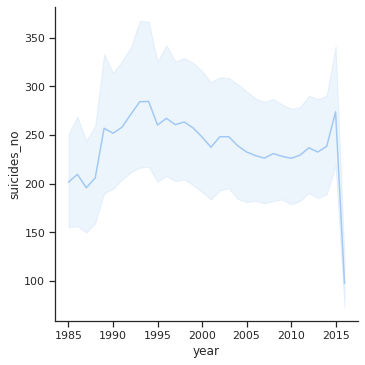

In [ ]:
sns.relplot(
    data=isuic, kind="line",
    x="year", y="suicides_no"
)

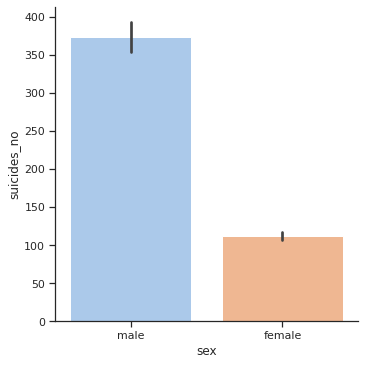

In [ ]:
sns.catplot(data=isuic, kind="bar", x="sex", y="suicides_no")

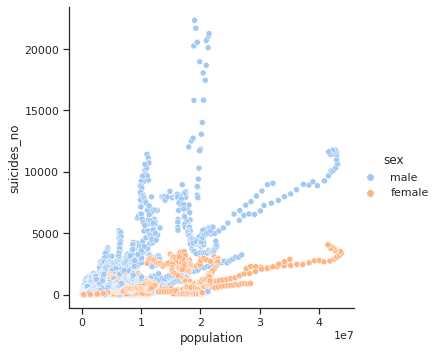

In [ ]:
sns.relplot(
    data=isuic,
    x="population", y="suicides_no", hue="sex"
)

In [ ]:
isuic['age'] = isuic['age'].replace({'5-14 years': '5-14', '15-24 years': '15-24', '25-34 years': '25-34', '35-54 years': '35-54','55-74 years': '55-74', '75+ years': '75+'})


In [ ]:
isuic['age'] = isuic['age'].astype('category')

In [ ]:
isuic['age'].cat.reorder_categories(['5-14', '15-24', '25-34', '35-54', '55-74', '75+'])

0        15-24
1        35-54
2        15-24
3          75+
4        25-34
         ...  
27815    35-54
27816      75+
27817     5-14
27818     5-14
27819    55-74
Name: age, Length: 27820, dtype: category
Categories (6, object): ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']

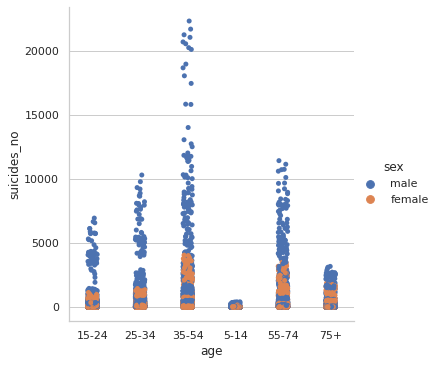

In [ ]:
sns.catplot(x="age", y="suicides_no", hue="sex", data=isuic)

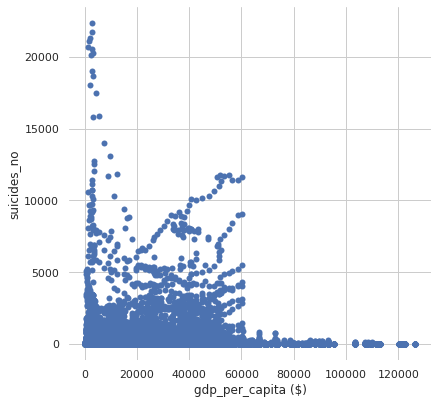

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="gdp_per_capita ($)", y="suicides_no",
                palette="ch:r=-.2,d=.3_r", linewidth=0,
                data=isuic, ax=ax)

In [ ]:
sorted_nb = isuic.groupby(['age'])['suicides_no'].median().sort_values()
print(sorted_nb)


age
5-14      2.0
75+      19.0
15-24    33.0
25-34    41.0
55-74    56.5
35-54    87.0
Name: suicides_no, dtype: float64


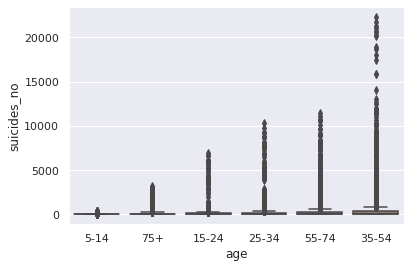

In [ ]:
sns.boxplot(x=isuic['age'], y=isuic['suicides_no'], order=list(sorted_nb.index))

In [ ]:
sorted_ns = isuic.groupby(['country'])['suicides_no'].median().sort_values()
print(sorted_ns)

country
Kiribati                 0.0
Oman                     0.0
Dominica                 0.0
Grenada                  0.0
Qatar                    0.0
                       ...  
France                 715.0
Germany                759.0
Russian Federation    1526.5
Japan                 1641.0
United States         2193.0
Name: suicides_no, Length: 101, dtype: float64


In [ ]:
usa = isuic.loc[isuic['country'] == "United States"]

In [ ]:
isuic.loc[isuic['suicides_no']>20]

,country,year,sex,age,suicides_no,population,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,796
96,Albania,1997,male,25-34 years,36,236000,793
97,Albania,1997,male,15-24 years,33,244400,793
99,Albania,1997,male,35-54 years,30,380800,793
100,Albania,1997,female,15-24 years,21,294000,793
...,...,...,...,...,...,...,...
27814,Uzbekistan,2014,female,25-34 years,162,2735238,2309
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,2309


In [ ]:
metai = isuic.loc[isuic['year'] == 2016]

In [ ]:
daug = metai[metai['suicides_no']>50]

In [ ]:
sorted_daug = daug.groupby(['country'])['suicides_no'].median().sort_values()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

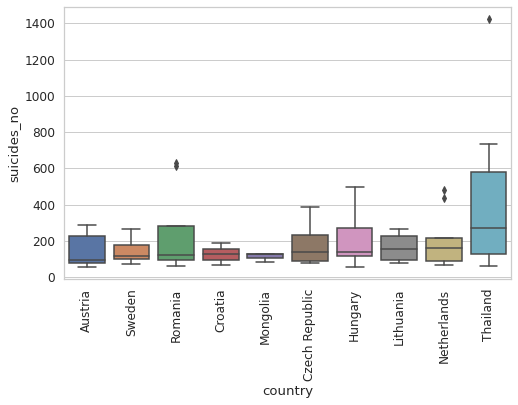

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.boxplot(x=daug['country'], y=daug['suicides_no'], order=list(sorted_daug.index))

plt.xticks(rotation=90)
